# Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Load data from the csv file and validate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

(1470, 35)

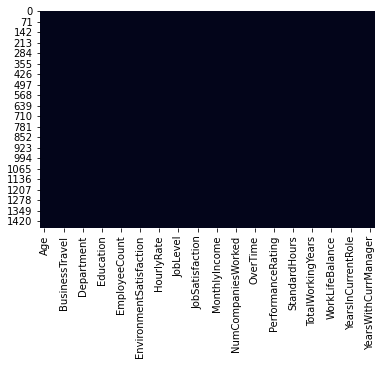

In [2]:
employeeData = pd.read_csv('Data/EmployeeAttrition.csv')
employeeData.info()
sns.heatmap(employeeData.isnull(), cbar=False)
employeeData.shape
#employeeData.head()

# Exploring the data through visualization

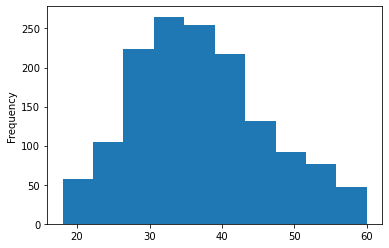

In [3]:
#Check the age group structure
employeeData['Age'].plot.hist()

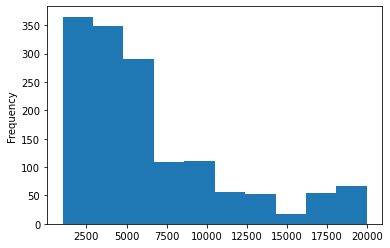

In [4]:
#Check the monthly income structure
employeeData['MonthlyIncome'].plot.hist()

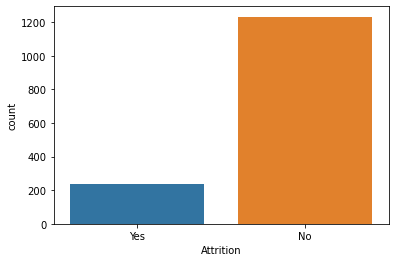

In [5]:
#Check the proportion of attrition rate
sns.countplot(x='Attrition', data=employeeData)

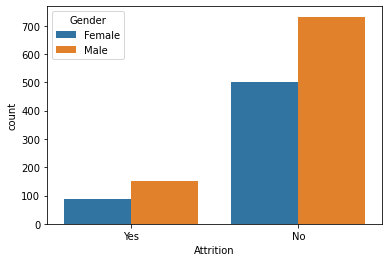

In [6]:
#Compare the attrition rate by gender group
sns.countplot(x='Attrition', hue='Gender', data=employeeData)

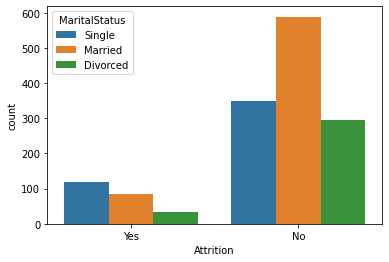

In [7]:
#Compare the attrition rate proportion by marital status
sns.countplot(x='Attrition', hue='MaritalStatus', data=employeeData)

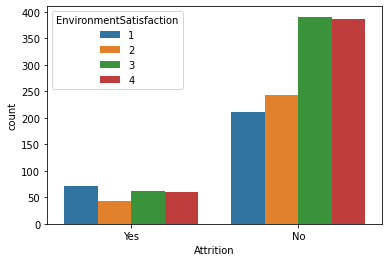

In [8]:
#Check attrition rate by marital status
sns.countplot(x='Attrition', hue='EnvironmentSatisfaction', data=employeeData)   

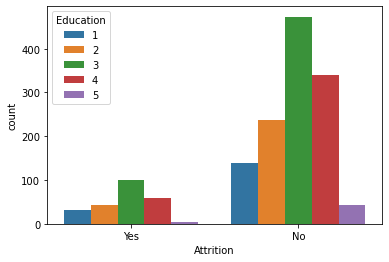

In [9]:
#Check attrition rate by Education Level
sns.countplot(x='Attrition', hue='Education', data=employeeData)

# Getting the data ready for testing

In [10]:
#Assigning numerical values to non-numerical (string) data 
Gender = pd.get_dummies(employeeData['Gender'],drop_first=True)
BusinessTravel = pd.get_dummies(employeeData['BusinessTravel'],drop_first=True)
Department = pd.get_dummies(employeeData['Department'],drop_first=True)
MaritalStatus = pd.get_dummies(employeeData['MaritalStatus'],drop_first=True)
Over18 = pd.get_dummies(employeeData['Over18'],drop_first=True)
OverTime = pd.get_dummies(employeeData['OverTime'],drop_first=True)
EducationField = pd.get_dummies(employeeData['EducationField'],drop_first=True)
JobRole = pd.get_dummies(employeeData['JobRole'],drop_first=True)

Attrition = pd.get_dummies(employeeData['Attrition'],drop_first=True)

#Combining the numerized and original data into a new file and checking the structutre
employeeDataMod = pd.concat([employeeData,Gender,BusinessTravel,Department,
                           MaritalStatus,Over18,OverTime,EducationField,JobRole],axis=1)
employeeDataMod.head()

#Dropping the unncessary or duplicate information and checking the dataframe structutre
employeeDataMod.drop(['Gender','BusinessTravel','Department','EmployeeNumber','EmployeeCount','JobRole','MaritalStatus',
                      'EducationField','Over18','OverTime'],axis=1,inplace=True)
#Check 
employeeDataMod.info()
employeeDataMod.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   DistanceFromHome          1470 non-null   int64 
 4   Education                 1470 non-null   int64 
 5   EnvironmentSatisfaction   1470 non-null   int64 
 6   HourlyRate                1470 non-null   int64 
 7   JobInvolvement            1470 non-null   int64 
 8   JobLevel                  1470 non-null   int64 
 9   JobSatisfaction           1470 non-null   int64 
 10  MonthlyIncome             1470 non-null   int64 
 11  MonthlyRate               1470 non-null   int64 
 12  NumCompaniesWorked        1470 non-null   int64 
 13  PercentSalaryHike         1470 non-null   int64 
 14  PerformanceRating       

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Other,Technical Degree,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,41,Yes,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,0,0,0,1,0
1,49,No,279,8,1,3,61,2,2,2,...,0,0,0,0,0,0,0,1,0,0
2,37,Yes,1373,2,2,4,92,2,1,3,...,1,0,0,1,0,0,0,0,0,0
3,33,No,1392,3,4,4,56,3,1,3,...,0,0,0,0,0,0,0,1,0,0
4,27,No,591,2,1,1,40,3,1,2,...,0,0,0,1,0,0,0,0,0,0


# Testing the model

In [11]:
#Take the independent and dependent variables info from the polished data
X=employeeDataMod.drop(['Attrition'],axis=1)
y= Attrition

#An additional step of normalizing the data to avoid ConvergenceWarning
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#Split the input and output data to testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

#Train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

#Test the model
y_pred = logreg.predict(X_test)

#To verify the test results, two metrics are chosen
print("Accuracy score = " + str(accuracy_score(y_test, y_pred)))
print("F1 score = " + str(f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))))

Accuracy score = 0.8707482993197279
F1 score = 0.8559255024432424


# Remarks

Other metrics can also be used since no threshold is defined in a specific metric. The accuracy and f1 scores are remarkablly good. It should be noted that I have played with the parameters beforehand to improve accuracy. 

                                                   ***The end***